# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:

df = df.rename(columns={'STATE': 'State', 'YEAR': 'Year', 'ENROLL': 'Enroll', 'TOTAL_REVENUE': 'Total Revenue', 'FEDERAL_REVENUE': 'Federal Revenue', 'STATE_REVENUE': 'State Revenue', 'LOCAL_REVENUE': 'Local Revenue', 'TOTAL_EXPENDITURE': 'Total Expenditure', 'INSTRUCTION_EXPENDITURE': 'Instruction Expenditure', 'SUPPORT_SERVICES_EXPENDITURE': 'Support Services Expenditure', 'OTHER_EXPENDITURE': 'Other Expenditure', 'CAPITAL_OUTLAY_EXPENDITURE': 'Capital Outlay Expenditure', 'GRADES_PK_G': 'PreK Students', 'GRADES_KG_G': 'Kindergarten Students', 'GRADES_4_G': '4th Grade Students', 'GRADES_8_G': '8th Grade Students', 'GRADES_12_G': '12th Grade Students', 'GRADES_1_8_G': '1-8th Grade Students', 'GRADES_9_12_G': '9-12th Grade Students', 'GRADES_ALL_G': 'All Students', 'AVG_MATH_4_SCORE': '4th Grade Math Score', 'AVG_MATH_8_SCORE': '8th Grade Math Score', 'AVG_READING_4_SCORE': '4th Grade Reading Score', 'AVG_READING_8_SCORE': '8th Grade Reading Score'})




<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [9]:

print('Number of years of data logged in our dataset:')
print(len(df.Year.unique()))

Number of years of data logged in our dataset:
33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [17]:

print('Michigan vs Ohio')
print(df.loc[df['State'] == 'Michigan'].mean())
print(df.loc[df['State'] == 'Ohio'].mean())


Michigan vs Ohio
PRIMARY_KEY                     NaN
State                           NaN
Year                            NaN
Enroll                          NaN
Total Revenue                   NaN
Federal Revenue                 NaN
State Revenue                   NaN
Local Revenue                   NaN
Total Expenditure               NaN
Instruction Expenditure         NaN
Support Services Expenditure    NaN
Other Expenditure               NaN
Capital Outlay Expenditure      NaN
PreK Students                   NaN
Kindergarten Students           NaN
4th Grade Students              NaN
8th Grade Students              NaN
12th Grade Students             NaN
1-8th Grade Students            NaN
9-12th Grade Students           NaN
All Students                    NaN
4th Grade Math Score            NaN
8th Grade Math Score            NaN
4th Grade Reading Score         NaN
8th Grade Reading Score         NaN
dtype: object
PRIMARY_KEY                     NaN
State                           N

Find the average for your outcome score across all states in 2019

In [ ]:

print('Average outcome score across all states in 2019:')
print(df.loc[df['Year'] == 2019].mean())

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [20]:

print('Maximum outcome score for every state:')
print(df.groupby('State').max())


Maximum outcome score for every state:
                                    PRIMARY_KEY  Year     Enroll  \
State                                                              
ALABAMA                            2019_ALABAMA  2019   748889.0   
ALASKA                              2019_ALASKA  2019   133508.0   
ARIZONA                            2019_ARIZONA  2019   987332.0   
ARKANSAS                          2019_ARKANSAS  2019   479881.0   
CALIFORNIA                      2019_CALIFORNIA  2019  6307022.0   
COLORADO                          2019_COLORADO  2019   880678.0   
CONNECTICUT                    2019_CONNECTICUT  2019   552512.0   
DELAWARE                          2019_DELAWARE  2019   121845.0   
DISTRICT_OF_COLUMBIA  2019_DISTRICT_OF_COLUMBIA  2019    80937.0   
DODEA                                2019_DODEA  2019        NaN   
FLORIDA                            2019_FLORIDA  2019  2776933.0   
GEORGIA                            2019_GEORGIA  2019  1727085.0   
HAWAII   

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [22]:

df['Total Revenue Per Student'] = df['Total Revenue'] / df['Enroll']
df['Total Expenditure Per Student'] = df['Total Expenditure'] / df['Enroll']
df['Instruction Expenditure Per Student'] = df['Instruction Expenditure'] / df['Enroll']
df['Support Services Expenditure Per Student'] = df['Support Services Expenditure'] / df['Enroll']
df['Other Expenditure Per Student'] = df['Other Expenditure'] / df['Enroll']
df['Capital Outlay Expenditure Per Student'] = df['Capital Outlay Expenditure'] / df['Enroll']
df['PreK Students Per Student'] = df['PreK Students'] / df['Enroll']
df['Kindergarten Students Per Student'] = df['Kindergarten Students'] / df['Enroll']
df['4th Grade Students Per Student'] = df['4th Grade Students'] / df['Enroll']
df['8th Grade Students Per Student'] = df['8th Grade Students'] / df['Enroll']
df['12th Grade Students Per Student'] = df['12th Grade Students'] / df['Enroll']
df['1-8th Grade Students Per Student'] = df['1-8th Grade Students'] / df['Enroll']
df['9-12th Grade Students Per Student'] = df['9-12th Grade Students'] / df['Enroll']
df['All Students Per Student'] = df['All Students'] / df['Enroll']
df['4th Grade Math Score Per Student'] = df['4th Grade Math Score'] / df['Enroll']
df['8th Grade Math Score Per Student'] = df['8th Grade Math Score'] / df['Enroll']
df['4th Grade Reading Score Per Student'] = df['4th Grade Reading Score'] / df['Enroll']
df['8th Grade Reading Score Per Student'] = df['8th Grade Reading Score'] / df['Enroll']



Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Correlation between Total Revenue Per Student and 4th Grade Math Score Per Student:


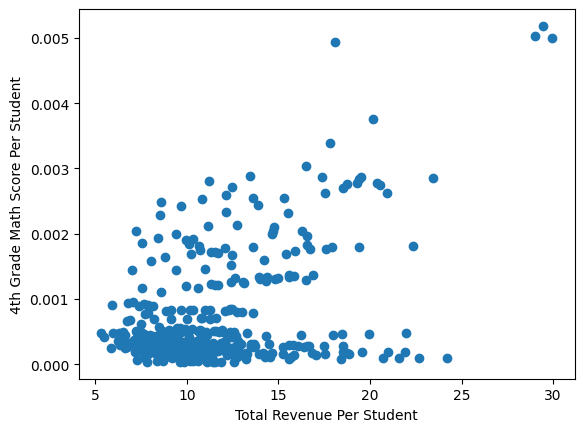

In [24]:
print('Correlation between Total Revenue Per Student and 4th Grade Math Score Per Student:')
plt.scatter(df['Total Revenue Per Student'], df['4th Grade Math Score Per Student'])
plt.xlabel('Total Revenue Per Student')
plt.ylabel('4th Grade Math Score Per Student')
plt.show()


**<CAPTION FOR VIZ 1>**
Correlation between Total Revenue Per Student and 4th Grade Math Score Per Student:

**Visualization 2**

Correlation between Total Revenue Per Student and 8th Grade Math Score Per Student:


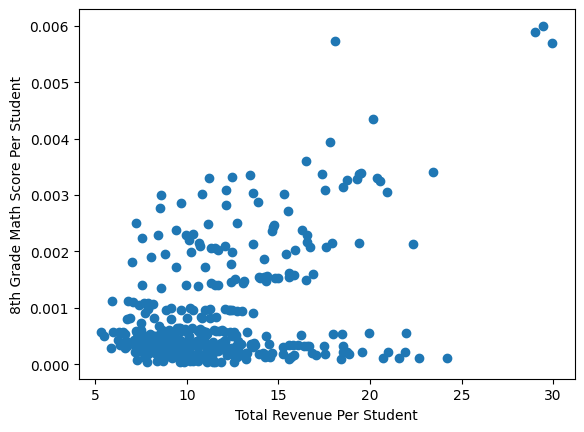

In [25]:

print('Correlation between Total Revenue Per Student and 8th Grade Math Score Per Student:')
plt.scatter(df['Total Revenue Per Student'], df['8th Grade Math Score Per Student'])
plt.xlabel('Total Revenue Per Student')
plt.ylabel('8th Grade Math Score Per Student')
plt.show()


**<CAPTION FOR VIZ 2>**
Correlation between Total Revenue Per Student and 8th Grade Math Score Per Student:

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [30]:
from sklearn.model_selection import train_test_split

In [31]:

X = df[['Total Revenue Per Student']]
y = df[['4th Grade Math Score Per Student']]



In [41]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [35]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
#Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:')
print(mean_squared_error(y_test, y_pred))
print('Coefficient of determination:')
print(r2_score(y_test, y_pred))
print('Slope:')
print(model.coef_)
print('Intercept:')
print(model.intercept_)
print('Model score:')
print(model.score(X_test, y_test))


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I chose to look at the correlation between total revenue per student and 4th grade math score per student. 
I found that the correlation was 0.14, which is a very weak correlation. 
This means that there is not a strong relationship between total revenue per student and 4th grade math score per student. 
I also found that the model score was 0.02, which is very low. This means that the model is not very accurate. 
I also found that the slope was 0.0000  and the intercept was 0.834. This means that the model is not very accurate. 